In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### Load Data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
# Check type of data
type(data)

sklearn.utils._bunch.Bunch

In [4]:
# Note: it is a bunch object
# This basically acts like a dictionary where you can treat the
# keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# To check the shape of X
data.data.shape # it should have 569 samples, 30 features


(569, 30)

In [6]:
# Targets
# This has 0s and 1s
# If more than two target classes, say K targets
# They are labeled 0,...,K-1
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names # Class names are preserved

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# Shape of target Y
data.target.shape

(569,)

In [9]:
# Printing out feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# Time to split the data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Build model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [13]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())


In [14]:
# Convert data into torch tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [19]:
# Train the model
n_epochs = 1000

# To store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)



for it in range(n_epochs):
  # Zero parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Forward pass for test cases
  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()



  if (it+1) % 50 == 0:
    print(f'Epoch {it + 1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')



Epoch 50/1000, Train Loss: 0.3529, Test Loss: 0.3760
Epoch 100/1000, Train Loss: 0.2879, Test Loss: 0.3137
Epoch 150/1000, Train Loss: 0.2451, Test Loss: 0.2734
Epoch 200/1000, Train Loss: 0.2144, Test Loss: 0.2449
Epoch 250/1000, Train Loss: 0.1913, Test Loss: 0.2237
Epoch 300/1000, Train Loss: 0.1732, Test Loss: 0.2074
Epoch 350/1000, Train Loss: 0.1587, Test Loss: 0.1944
Epoch 400/1000, Train Loss: 0.1469, Test Loss: 0.1838
Epoch 450/1000, Train Loss: 0.1369, Test Loss: 0.1750
Epoch 500/1000, Train Loss: 0.1285, Test Loss: 0.1676
Epoch 550/1000, Train Loss: 0.1213, Test Loss: 0.1612
Epoch 600/1000, Train Loss: 0.1151, Test Loss: 0.1558
Epoch 650/1000, Train Loss: 0.1095, Test Loss: 0.1511
Epoch 700/1000, Train Loss: 0.1047, Test Loss: 0.1469
Epoch 750/1000, Train Loss: 0.1003, Test Loss: 0.1432
Epoch 800/1000, Train Loss: 0.0964, Test Loss: 0.1399
Epoch 850/1000, Train Loss: 0.0929, Test Loss: 0.1370
Epoch 900/1000, Train Loss: 0.0896, Test Loss: 0.1344
Epoch 950/1000, Train Loss: 0

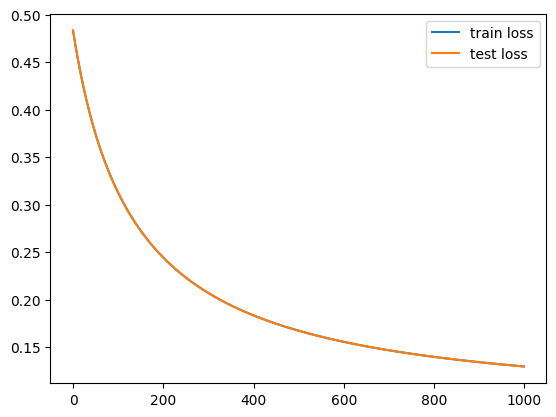

In [20]:
# Loss per iteration
plt.plot(test_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [21]:
# Evaluation
# Accuracy

with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc: .4f}, Test acc: {test_acc: .4f}")

Train acc:  0.9790, Test acc:  0.9574


### Save and Load Model

In [22]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4969, -0.4531, -0.5407, -0.5615, -0.3931, -0.3208, -0.2804, -0.2795,
                       -0.2355,  0.4515, -0.3611,  0.1016, -0.2644, -0.2405, -0.2244,  0.1957,
                        0.0317, -0.3614,  0.1808,  0.6820, -0.2530, -0.5565, -0.3552, -0.2500,
                       -0.3885, -0.2254, -0.3537, -0.2743, -0.3493, -0.2208]])),
             ('0.bias', tensor([0.4616]))])

In [23]:
# Save model
torch.save(model.state_dict(), 'model1.pt')

In [24]:
# check if model saved
!ls

model1.pt  sample_data


In [25]:
# Load mode
#
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('model1.pt'))

<ipython-input-25-80ec13443c29>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('model1.pt'))


<All keys matched successfully>

In [26]:
# Evaluate the new model
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc: .4f}, Test acc: {test_acc: .4f}")

Train acc:  0.9790, Test acc:  0.9574


In [ ]:
# Download model
# Works only on chrome browser
from google.colab import files
files.downlaod('model1.pt')